In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/survey.csv', header=0, parse_dates=[0], dayfirst=True)
zeitstempel = data['Zeitstempel'].dt.date
zeitstempel

0      2021-03-18
1      2021-03-18
2      2021-03-18
3      2021-03-18
4      2021-03-22
          ...    
913    2021-04-25
914    2021-04-26
915    2021-04-29
916    2021-06-01
917    2021-06-05
Name: Zeitstempel, Length: 918, dtype: object

In [6]:
df_counts = zeitstempel.value_counts().sort_index().reset_index()

In [7]:
df_counts

,Zeitstempel,count
0,2021-03-18,4
1,2021-03-22,4
2,2021-03-23,19
3,2021-03-24,2
4,2021-03-25,1
5,2021-03-26,256
6,2021-03-27,48
7,2021-03-28,13
8,2021-03-29,7
9,2021-03-30,39


<Axes: xlabel='Zeitstempel', ylabel='count'>

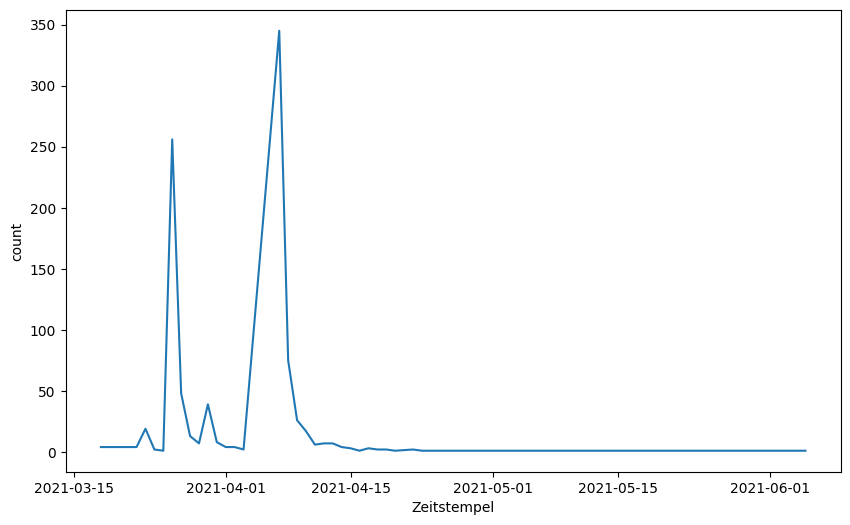

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(df_counts, y='count', x='Zeitstempel')

<Axes: xlabel='count', ylabel='Zeitstempel'>

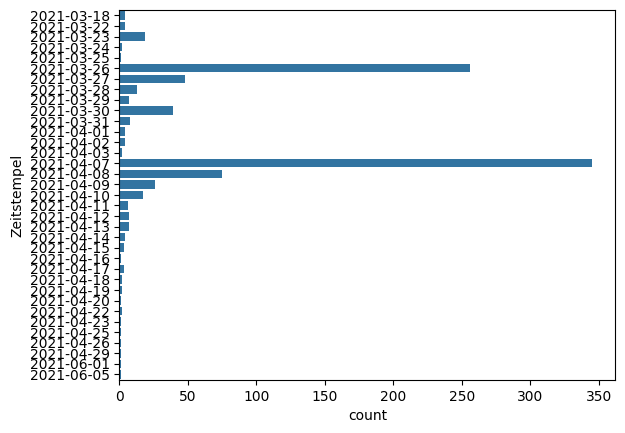

In [14]:
sns.barplot(df_counts, y='Zeitstempel', x='count')
#plt.yticks(rotation=90, ha='right')